In [80]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [81]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [82]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Using yfinance to Extract Stock Data


Using the Ticker function, the ticker symbol of the stock I want to extract data is 
entered to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [83]:
Tesla = yf.Ticker("TSLA")

In [84]:
Tesla

yfinance.Ticker object <TSLA>

Using the ticker object and the function history, I extract stock 
information and save it in a dataframe named tesla_data. The period parameter is set to max so I get information for the maximum amount of time.



In [85]:
tesla_data = Tesla.history(period="max")
df=tesla_data

In [86]:
# Reset the index and display first 5 records
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [87]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm" 

In [88]:
html_data = requests.get(url).text

Parse the html data using beautiful_soup. Then scrape the table on the webpage into a dataframe, it should look like the table from the website.

In [89]:
soup = BeautifulSoup(html_data,"html.parser")

By using beautiful soup extracting the table with Tesla Quarterly Revenue and store it 
into a dataframe named tesla_revenue. The comma and dollar sign is removed from the Revenue column

In [90]:
df=pd.read_html(html_data,header=0)
table=soup.find_all('table')
second_table= table[1]
tesla_revenue= pd.DataFrame(columns=["Date","Revenue"])
for row in second_table.find("tbody").find_all("tr"):
    col= row.find_all('td')
    date= col[0].string
    revenue= col[1].string
    tesla_revenue= tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)
tesla_revenue["Revenue"]= tesla_revenue['Revenue'].str.replace('$','').str.replace(',','')
 

In [91]:
tesla_revenue.dropna(subset=['Revenue'], inplace=True)
for i in tesla_revenue : tesla_revenue[i] = tesla_revenue[i].astype(str)

In [92]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [93]:
# last 5 records 
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [95]:
import matplotlib.pyplot as plt

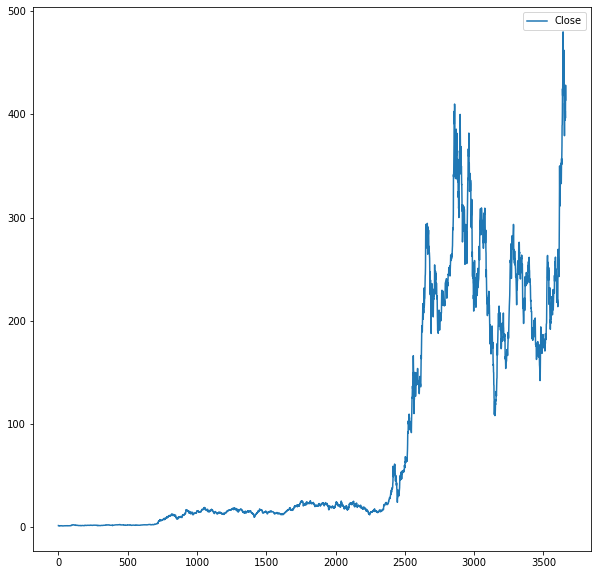

In [98]:
plt.figure(figsize = (10,10))
plt.plot(tesla_data['Close'],label="Close")
plt.legend()
plt.show()

In [99]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 3: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [48]:
GME= yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [49]:
GME_share_price_data = GME.history(period="max")
df1=GME_share_price_data

reset the index, save, and display the first five rows of the gme_data dataframe using the head function.



In [51]:
df1.reset_index(inplace=True)
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Using Webscraping to Extract GME Revenue Data

In [52]:
#url= "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [53]:
# Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

soup = BeautifulSoup(html_data,"html.parser")


 Using beautiful soup, I extract the table with Tesla Quarterly Revenue and store it into a dataframe named gme_revenue.

In [54]:
df=pd.read_html(html_data,header=0)
table=soup.find_all('table')
#second_table= table[1]
gme_revenue= pd.DataFrame(columns=["Date","Revenue"])
for row in second_table.find("tbody").find_all("tr"):
    col= row.find_all('td')
    date= col[0].string
    revenue= col[1].string
    gme_revenue= gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)
gme_revenue["Revenue"]= gme_revenue['Revenue'].str.replace('$','').str.replace(',','')

gme_revenue.dropna(subset=['Revenue'], inplace=True)
for i in gme_revenue : gme_revenue[i] = gme_revenue[i].astype(str)
print(gme_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

/var/folders/d1/xdl3sbzs53l3xdnpk9b8kh700000gn/T/ipykernel_47081/1856452820.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



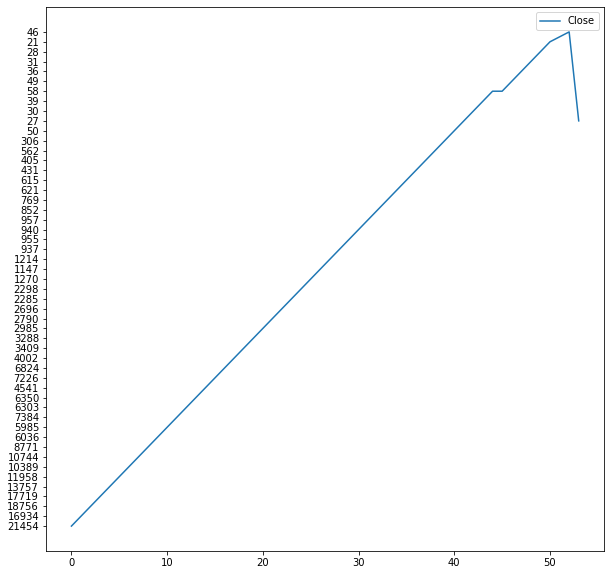

In [100]:
plt.figure(figsize = (10,10))
plt.plot(gme_revenue['Revenue'],label="Revenue")
plt.legend()
plt.show()